In [346]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.io as io
import scipy.signal as sig
import math as math
import random 
from scipy import integrate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.style.use('seaborn-colorblind')
plt.rcParams['image.cmap'] = 'RdBu'

In [347]:
dfCrime08 = pd.read_excel('../crime08.xls')
dfCrime09 = pd.read_excel('../crime09.xls')
dfCrime10 = pd.read_excel('../crime10.xls')
dfCrime11 = pd.read_excel('../crime11.xls')
dfCrime12 = pd.read_excel('../crime12.xls')

# Cleaning Data

In [348]:
dfCrime08.drop(dfCrime08.head(3).index, inplace=True)
dfCrime09.drop(dfCrime09.head(3).index, inplace=True)
dfCrime10.drop(dfCrime10.head(3).index, inplace=True)
dfCrime11.drop(dfCrime11.head(3).index, inplace=True)
dfCrime12.drop(dfCrime12.head(3).index, inplace=True)
#dfCrime08.head(10)

In [349]:
dfCrime08 = dfCrime08.reset_index()
del dfCrime08['index']

dfCrime09 = dfCrime09.reset_index()
del dfCrime09['index']

dfCrime10 = dfCrime10.reset_index()
del dfCrime10['index']

dfCrime11 = dfCrime11.reset_index()
del dfCrime11['index']

dfCrime12 = dfCrime12.reset_index()
del dfCrime12['index']

In [350]:

dfCrime08.columns = dfCrime08.iloc[0]
dfCrime08 = dfCrime08[1:]

dfCrime09.columns = dfCrime09.iloc[0]
dfCrime09 = dfCrime09[1:]

dfCrime10.columns = dfCrime10.iloc[0]
dfCrime10 = dfCrime10[1:]

dfCrime11.columns = dfCrime11.iloc[0]
dfCrime11 = dfCrime11[1:]

dfCrime12.columns = dfCrime12.iloc[0]
dfCrime12 = dfCrime12[1:]

In [351]:
dfCrime08 = dfCrime08.reset_index()
del dfCrime08['index']

dfCrime09 = dfCrime09.reset_index()
del dfCrime09['index']

dfCrime10 = dfCrime10.reset_index()
del dfCrime10['index']

dfCrime11 = dfCrime11.reset_index()
del dfCrime11['index']

dfCrime12 = dfCrime12.reset_index()
del dfCrime12['index']

# Total Amount of crimes for each year

0   2008        Carlsbad        1362
1   2008     Chula_Vista        3060
2   2008        Coronado         402
3   2008         Del_Mar         118
4   2008        El_Cajon        1386
5   2008       Encinitas         574
6   2008       Escondido        1809
7   2008  Imperial_Beach         273
8   2008         La_Mesa         879
9   2008     Lemon_Grove         411
10  2008   National_City        1418
11  2008       Oceanside        2503
12  2008           Poway         453
13  2008      San_Marcos         868
14  2008          Santee         584
15  2008    Solana_Beach         174
16  2008           Vista        1390
85

In [352]:
#dfCrime08=dfCrime08.dropna(axis=1,how='all')
#print(dfCrime08.head(5))

In [353]:
dfCrime12[dfCrime12.City == "National City"]

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Forcible rape,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson
270,National City,59920,371,4,18,165,184,1863,366,1090,407,30


In [354]:
totalCrimes = []

rcb = []
rcv = []
rco = []
rdm = []
rec = []
ren = []
res = []
rib = []
rlm = []
rlg = []
rnc = []
roc = []
rpo = []
rsm = []
rsa = []
rsb = []
rvi = []

tcb = 0
tcv = 0
tco = 0
tdm = 0
tec = 0
ten = 0
tes = 0
tib = 0
tlg = 0
tlm = 0
tnc = 0
toc = 0
tpo = 0
tsm = 0
tsa = 0
tsb = 0
tvi = 0

# ------------ 2008 ------------ 
# Calculates the crime counts for each region in 2008
cb = np.sum(dfCrime08[dfCrime08.City == "Carlsbad"].sum()[2:])
cv = np.sum(dfCrime08[dfCrime08.City == "Chula Vista"].sum()[2:])
co = np.sum(dfCrime08[dfCrime08.City == "Coronado"].sum()[2:])
dm = np.sum(dfCrime08[dfCrime08.City == "Del Mar"].sum()[2:])
ec = np.sum(dfCrime08[dfCrime08.City == "El Cajon"].sum()[2:])
en = np.sum(dfCrime08[dfCrime08.City == "Encinitas"].sum()[2:])
es = np.sum(dfCrime08[dfCrime08.City == "Escondido"].sum()[2:])
ib = np.sum(dfCrime08[dfCrime08.City == "Imperial Beach"].sum()[2:])
lm = np.sum(dfCrime08[dfCrime08.City == "La Mesa"].sum()[2:])
lg = np.sum(dfCrime08[dfCrime08.City == "Lemon Grove"].sum()[2:])
nc = np.sum(dfCrime08[dfCrime08.City == "National City"].sum()[2:])
oc = np.sum(dfCrime08[dfCrime08.City == "Oceanside"].sum()[2:])
po = np.sum(dfCrime08[dfCrime08.City == "Poway"].sum()[2:])
sm = np.sum(dfCrime08[dfCrime08.City == "San Marcos"].sum()[2:])
sa = np.sum(dfCrime08[dfCrime08.City == "Santee"].sum()[2:])
sb = np.sum(dfCrime08[dfCrime08.City == "Solana Beach"].sum()[2:])
vi = np.sum(dfCrime08[dfCrime08.City == "Vista"].sum()[2:])

# Appending the crime rates for the each year for the given year
rcb.append((cb/int(dfCrime08[dfCrime08.City == "Carlsbad"].Population)))
rcv.append((cv/int(dfCrime08[dfCrime08.City == "Chula Vista"].Population)))
rco.append((co/int(dfCrime08[dfCrime08.City == "Coronado"].Population)))
rdm.append((dm/int(dfCrime08[dfCrime08.City == "Del Mar"].Population)))
rec.append((ec/int(dfCrime08[dfCrime08.City == "El Cajon"].Population)))
ren.append((en/int(dfCrime08[dfCrime08.City == "Encinitas"].Population)))
res.append((es/int(dfCrime08[dfCrime08.City == "Escondido"].Population)))
rib.append((ib/int(dfCrime08[dfCrime08.City == "Imperial Beach"].Population)))
rlm.append((lm/int(dfCrime08[dfCrime08.City == "La Mesa"].Population)))
rlg.append((lg/int(dfCrime08[dfCrime08.City == "Lemon Grove"].Population)))
rnc.append((nc/int(dfCrime08[dfCrime08.City == "National City"].Population)))
roc.append((oc/int(dfCrime08[dfCrime08.City == "Oceanside"].Population)))
rpo.append((po/int(dfCrime08[dfCrime08.City == "Poway"].Population)))
rsm.append((sm/int(dfCrime08[dfCrime08.City == "San Marcos"].Population)))
rsa.append((sa/int(dfCrime08[dfCrime08.City == "Santee"].Population)))
rsb.append((sb/int(dfCrime08[dfCrime08.City == "Solana Beach"].Population)))
rvi.append((vi/int(dfCrime08[dfCrime08.City == "Vista"].Population)))

# Increments the total amount of crimes for each region
tcb += cb
tcv += cv
tco += co
tdm += dm
tec += ec
ten += en
tes += es
tib += ib
tlm += lm
tlg += lg
tnc += nc
toc += oc
tpo += po 
tsm += sm
tsa += sa
tsb += sb
tvi += vi

# Total amount of crimes for 2008
total08 = cb+cv+co+dm+ec+en+es+ib+lm+lg+nc+oc+po+sm+sa+sb+vi
totalCrimes.append(total08)





# ------------ 2009 ------------ 
# Calculates the crime counts for each region in 2009
cb = np.sum(dfCrime09[dfCrime09.City == "Carlsbad"].sum()[2:])
cv = np.sum(dfCrime09[dfCrime09.City == "Chula Vista"].sum()[2:])
co = np.sum(dfCrime09[dfCrime09.City == "Coronado"].sum()[2:])
dm = np.sum(dfCrime09[dfCrime09.City == "Del Mar"].sum()[2:])
ec = np.sum(dfCrime09[dfCrime09.City == "El Cajon"].sum()[2:])
en = np.sum(dfCrime09[dfCrime09.City == "Encinitas"].sum()[2:])
es = np.sum(dfCrime09[dfCrime09.City == "Escondido"].sum()[2:])
ib = np.sum(dfCrime09[dfCrime09.City == "Imperial Beach"].sum()[2:])
lm = np.sum(dfCrime09[dfCrime09.City == "La Mesa"].sum()[2:])
lg = np.sum(dfCrime09[dfCrime09.City == "Lemon Grove"].sum()[2:])
nc = np.sum(dfCrime09[dfCrime09.City == "National City"].sum()[2:])
oc = np.sum(dfCrime09[dfCrime09.City == "Oceanside"].sum()[2:])
po = np.sum(dfCrime09[dfCrime09.City == "Poway"].sum()[2:])
sm = np.sum(dfCrime09[dfCrime09.City == "San Marcos"].sum()[2:])
sa = np.sum(dfCrime09[dfCrime09.City == "Santee"].sum()[2:])
sb = np.sum(dfCrime09[dfCrime09.City == "Solana Beach"].sum()[2:])
vi = np.sum(dfCrime09[dfCrime09.City == "Vista"].sum()[2:])

print(nc)

# Appending the crime rates for the each year for the given year
rcb.append((cb/int(dfCrime09[dfCrime09.City == "Carlsbad"].Population)))
rcv.append((cv/int(dfCrime09[dfCrime09.City == "Chula Vista"].Population)))
rco.append((co/int(dfCrime09[dfCrime09.City == "Coronado"].Population)))
rdm.append((dm/int(dfCrime09[dfCrime09.City == "Del Mar"].Population)))
rec.append((ec/int(dfCrime09[dfCrime09.City == "El Cajon"].Population)))
ren.append((en/int(dfCrime09[dfCrime09.City == "Encinitas"].Population)))
res.append((es/int(dfCrime09[dfCrime09.City == "Escondido"].Population)))
rib.append((ib/int(dfCrime09[dfCrime09.City == "Imperial Beach"].Population)))
rlm.append((lm/int(dfCrime09[dfCrime09.City == "La Mesa"].Population)))
rlg.append((lg/int(dfCrime09[dfCrime09.City == "Lemon Grove"].Population)))
rnc.append((nc/int(dfCrime09[dfCrime09.City == "National City"].Population)))
roc.append((oc/int(dfCrime09[dfCrime09.City == "Oceanside"].Population)))
rpo.append((po/int(dfCrime09[dfCrime09.City == "Poway"].Population)))
rsm.append((sm/int(dfCrime09[dfCrime09.City == "San Marcos"].Population)))
rsa.append((sa/int(dfCrime09[dfCrime09.City == "Santee"].Population)))
rsb.append((sb/int(dfCrime09[dfCrime09.City == "Solana Beach"].Population)))
rvi.append((vi/int(dfCrime09[dfCrime09.City == "Vista"].Population)))

# Increments the total amount of crimes for each region
tcb += cb
tcv += cv
tco += co
tdm += dm
tec += ec
ten += en
tes += es
tib += ib
tlm += lm
tlg += lg
tnc += nc
toc += oc
tpo += po 
tsm += sm
tsa += sa
tsb += sb
tvi += vi

# Total amount of crimes for 2009
tcb += cb
total09 = cb+cv+co+dm+ec+en+es+ib+lm+lg+nc+oc+po+sm+sa+sb+vi
totalCrimes.append(total09)





# ------------ 2010 ------------ 
# Calculates the crime counts for each region in 2010
cb = np.sum(dfCrime10[dfCrime10.City == "Carlsbad"].sum()[2:])
cv = np.sum(dfCrime10[dfCrime10.City == "Chula Vista"].sum()[2:])
co = np.sum(dfCrime10[dfCrime10.City == "Coronado"].sum()[2:])
dm = np.sum(dfCrime10[dfCrime10.City == "Del Mar"].sum()[2:])
ec = np.sum(dfCrime10[dfCrime10.City == "El Cajon"].sum()[2:])
en = np.sum(dfCrime10[dfCrime10.City == "Encinitas"].sum()[2:])
es = np.sum(dfCrime10[dfCrime10.City == "Escondido"].sum()[2:])
ib = np.sum(dfCrime10[dfCrime10.City == "Imperial Beach"].sum()[2:])
lm = np.sum(dfCrime10[dfCrime10.City == "La Mesa"].sum()[2:])
lg = np.sum(dfCrime10[dfCrime10.City == "Lemon Grove"].sum()[2:])
nc = np.sum(dfCrime10[dfCrime10.City == "National City"].sum()[2:])
oc = np.sum(dfCrime10[dfCrime10.City == "Oceanside"].sum()[2:])
po = np.sum(dfCrime10[dfCrime10.City == "Poway"].sum()[2:])
sm = np.sum(dfCrime10[dfCrime10.City == "San Marcos"].sum()[2:])
sa = np.sum(dfCrime10[dfCrime10.City == "Santee"].sum()[2:])
sb = np.sum(dfCrime10[dfCrime10.City == "Solana Beach"].sum()[2:])
vi = np.sum(dfCrime10[dfCrime10.City == "Vista"].sum()[2:])

# Appending the crime rates for the each year for the given year
rcb.append((cb/int(dfCrime10[dfCrime10.City == "Carlsbad"].Population)))
rcv.append((cv/int(dfCrime10[dfCrime10.City == "Chula Vista"].Population)))
rco.append((co/int(dfCrime10[dfCrime10.City == "Coronado"].Population)))
rdm.append((dm/int(dfCrime10[dfCrime10.City == "Del Mar"].Population)))
rec.append((ec/int(dfCrime10[dfCrime10.City == "El Cajon"].Population)))
ren.append((en/int(dfCrime10[dfCrime10.City == "Encinitas"].Population)))
res.append((es/int(dfCrime10[dfCrime10.City == "Escondido"].Population)))
rib.append((ib/int(dfCrime10[dfCrime10.City == "Imperial Beach"].Population)))
rlm.append((lm/int(dfCrime10[dfCrime10.City == "La Mesa"].Population)))
rlg.append((lg/int(dfCrime10[dfCrime10.City == "Lemon Grove"].Population)))
rnc.append((nc/int(dfCrime10[dfCrime10.City == "National City"].Population)))
roc.append((oc/int(dfCrime10[dfCrime10.City == "Oceanside"].Population)))
rpo.append((po/int(dfCrime10[dfCrime10.City == "Poway"].Population)))
rsm.append((sm/int(dfCrime10[dfCrime10.City == "San Marcos"].Population)))
rsa.append((sa/int(dfCrime10[dfCrime10.City == "Santee"].Population)))
rsb.append((sb/int(dfCrime10[dfCrime10.City == "Solana Beach"].Population)))
rvi.append((vi/int(dfCrime10[dfCrime10.City == "Vista"].Population)))

# Increments the total amount of crimes for each region
tcb += cb
tcv += cv
tco += co
tdm += dm
tec += ec
ten += en
tes += es
tib += ib
tlm += lm
tlg += lg
tnc += nc
toc += oc
tpo += po 
tsm += sm
tsa += sa
tsb += sb
tvi += vi

# Total amount of crimes for 2010
total10 = cb+cv+co+dm+ec+en+es+ib+lm+lg+nc+oc+po+sm+sa+sb+vi
totalCrimes.append(total10)





# ------------ 2011 ------------ 
# Calculates the crime counts for each region in 2011
cb = np.sum(dfCrime11[dfCrime11.City == "Carlsbad"].sum()[2:])
cv = np.sum(dfCrime11[dfCrime11.City == "Chula Vista"].sum()[2:])
co = np.sum(dfCrime11[dfCrime11.City == "Coronado"].sum()[2:])
dm = np.sum(dfCrime11[dfCrime11.City == "Del Mar"].sum()[2:])
ec = np.sum(dfCrime11[dfCrime11.City == "El Cajon"].sum()[2:])
en = np.sum(dfCrime11[dfCrime11.City == "Encinitas"].sum()[2:])
es = np.sum(dfCrime11[dfCrime11.City == "Escondido"].sum()[2:])
ib = np.sum(dfCrime11[dfCrime11.City == "Imperial Beach"].sum()[2:])
lm = np.sum(dfCrime11[dfCrime11.City == "La Mesa"].sum()[2:])
lg = np.sum(dfCrime11[dfCrime11.City == "Lemon Grove"].sum()[2:])
nc = np.sum(dfCrime11[dfCrime11.City == "National City"].sum()[2:])
oc = np.sum(dfCrime11[dfCrime11.City == "Oceanside"].sum()[2:])
po = np.sum(dfCrime11[dfCrime11.City == "Poway"].sum()[2:])
sm = np.sum(dfCrime11[dfCrime11.City == "San Marcos"].sum()[2:])
sa = np.sum(dfCrime11[dfCrime11.City == "Santee"].sum()[2:])
sb = np.sum(dfCrime11[dfCrime11.City == "Solana Beach"].sum()[2:])
vi = np.sum(dfCrime11[dfCrime11.City == "Vista"].sum()[2:])


# Appending the crime rates for the each year for the given year
rcb.append((cb/int(dfCrime11[dfCrime11.City == "Carlsbad"].Population)))
rcv.append((cv/int(dfCrime11[dfCrime11.City == "Chula Vista"].Population)))
rco.append((co/int(dfCrime11[dfCrime11.City == "Coronado"].Population)))
rdm.append((dm/int(dfCrime11[dfCrime11.City == "Del Mar"].Population)))
rec.append((ec/int(dfCrime11[dfCrime11.City == "El Cajon"].Population)))
ren.append((en/int(dfCrime11[dfCrime11.City == "Encinitas"].Population)))
res.append((es/int(dfCrime11[dfCrime11.City == "Escondido"].Population)))
rib.append((ib/int(dfCrime11[dfCrime11.City == "Imperial Beach"].Population)))
rlm.append((lm/int(dfCrime11[dfCrime11.City == "La Mesa"].Population)))
rlg.append((lg/int(dfCrime11[dfCrime11.City == "Lemon Grove"].Population)))
rnc.append((nc/int(dfCrime11[dfCrime11.City == "National City"].Population)))
roc.append((oc/int(dfCrime11[dfCrime11.City == "Oceanside"].Population)))
rpo.append((po/int(dfCrime11[dfCrime11.City == "Poway"].Population)))
rsm.append((sm/int(dfCrime11[dfCrime11.City == "San Marcos"].Population)))
rsa.append((sa/int(dfCrime11[dfCrime11.City == "Santee"].Population)))
rsb.append((sb/int(dfCrime11[dfCrime11.City == "Solana Beach"].Population)))
rvi.append((vi/int(dfCrime11[dfCrime11.City == "Vista"].Population)))

# Increments the total amount of crimes for each region
tcb += cb
tcv += cv
tco += co
tdm += dm
tec += ec
ten += en
tes += es
tib += ib
tlm += lm
tlg += lg
tnc += nc
toc += oc
tpo += po 
tsm += sm
tsa += sa
tsb += sb
tvi += vi

# Total amount of crimes for 2011
total11 = cb+cv+co+dm+ec+en+es+ib+lm+lg+nc+oc+po+sm+sa+sb+vi
totalCrimes.append(total11)





# ------------ 2012 ------------ 
# Calculates the crime counts for each region in 2012
cb = np.sum(dfCrime12[dfCrime12.City == "Carlsbad"].sum()[2:])
cv = np.sum(dfCrime12[dfCrime12.City == "Chula Vista"].sum()[2:])
co = np.sum(dfCrime12[dfCrime12.City == "Coronado"].sum()[2:])
dm = np.sum(dfCrime12[dfCrime12.City == "Del Mar"].sum()[2:])
ec = np.sum(dfCrime12[dfCrime12.City == "El Cajon"].sum()[2:])
en = np.sum(dfCrime12[dfCrime12.City == "Encinitas"].sum()[2:])
es = np.sum(dfCrime12[dfCrime12.City == "Escondido"].sum()[2:])
ib = np.sum(dfCrime12[dfCrime12.City == "Imperial Beach"].sum()[2:])
lm = np.sum(dfCrime12[dfCrime12.City == "La Mesa"].sum()[2:])
lg = np.sum(dfCrime12[dfCrime12.City == "Lemon Grove"].sum()[2:])
nc = np.sum(dfCrime12[dfCrime12.City == "National City"].sum()[2:])
oc = np.sum(dfCrime12[dfCrime12.City == "Oceanside"].sum()[2:])
po = np.sum(dfCrime12[dfCrime12.City == "Poway"].sum()[2:])
sm = np.sum(dfCrime12[dfCrime12.City == "San Marcos"].sum()[2:])
sa = np.sum(dfCrime12[dfCrime12.City == "Santee"].sum()[2:])
sb = np.sum(dfCrime12[dfCrime12.City == "Solana Beach"].sum()[2:])
vi = np.sum(dfCrime12[dfCrime12.City == "Vista"].sum()[2:])


# Appending the crime rates for the each year for the given year
rcb.append((cb/int(dfCrime12[dfCrime12.City == "Carlsbad"].Population)))
rcv.append((cv/int(dfCrime12[dfCrime12.City == "Chula Vista"].Population)))
rco.append((co/int(dfCrime12[dfCrime12.City == "Coronado"].Population)))
rdm.append((dm/int(dfCrime12[dfCrime12.City == "Del Mar"].Population)))
rec.append((ec/int(dfCrime12[dfCrime12.City == "El Cajon"].Population)))
ren.append((en/int(dfCrime12[dfCrime12.City == "Encinitas"].Population)))
res.append((es/int(dfCrime12[dfCrime12.City == "Escondido"].Population)))
rib.append((ib/int(dfCrime12[dfCrime12.City == "Imperial Beach"].Population)))
rlm.append((lm/int(dfCrime12[dfCrime12.City == "La Mesa"].Population)))
rlg.append((lg/int(dfCrime12[dfCrime12.City == "Lemon Grove"].Population)))
rnc.append((nc/int(dfCrime12[dfCrime12.City == "National City"].Population)))
roc.append((oc/int(dfCrime12[dfCrime12.City == "Oceanside"].Population)))
rpo.append((po/int(dfCrime12[dfCrime12.City == "Poway"].Population)))
rsm.append((sm/int(dfCrime12[dfCrime12.City == "San Marcos"].Population)))
rsa.append((sa/int(dfCrime12[dfCrime12.City == "Santee"].Population)))
rsb.append((sb/int(dfCrime12[dfCrime12.City == "Solana Beach"].Population)))
rvi.append((vi/int(dfCrime12[dfCrime12.City == "Vista"].Population)))


# Increments the total amount of crimes for each region
tcb += cb
tcv += cv
tco += co
tdm += dm
tec += ec
ten += en
tes += es
tib += ib
tlm += lm
tlg += lg
tnc += nc
toc += oc
tpo += po 
tsm += sm
tsa += sa
tsb += sb
tvi += vi

# Total amount of crimes for 2012
total12 = cb+cv+co+dm+ec+en+es+ib+lm+lg+nc+oc+po+sm+sa+sb+vi
totalCrimes.append(total12)



4705


# Visualizaitons

In [355]:
print("Total amount of crimes in 2008: " + str(total08))
print("Total amount of crimes in 2009: " + str(total09))
print("Total amount of crimes in 2010: " + str(total10))
print("Total amount of crimes in 2011: " + str(total11))
print("Total amount of crimes in 2012: " + str(total12))

print(" ")

print("Total crime counts: " + str(totalCrimes))
print(" ")

print("Total crime rates for Oceanside " + str(rnc))

Total amount of crimes in 2008: 79604
Total amount of crimes in 2009: 70067
Total amount of crimes in 2010: 68224
Total amount of crimes in 2011: 64420
Total amount of crimes in 2012: 68647
 
Total crime counts: [79604, 70067, 68224, 64420, 68647]
 
Total crime rates for Oceanside [0.08991412695740024, 0.07943609657268276, 0.080984538830638, 0.07386411567208247, 0.07506675567423231]


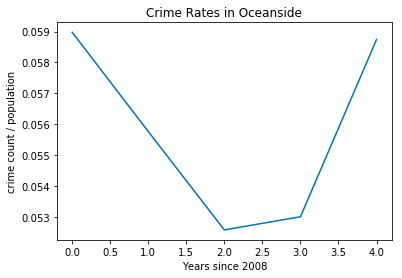

In [356]:
plt.title("Crime Rates in Oceanside")
plt.xlabel('Years since 2008')
plt.ylabel('crime count / population')
plt.plot(roc)

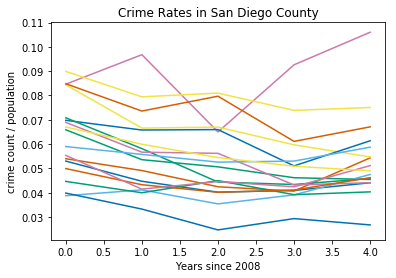

In [357]:
plt.title("Crime Rates in San Diego County")
plt.xlabel('Years since 2008')
plt.ylabel('crime count / population')
plt.plot(rcb)
plt.plot(rcv)
plt.plot(rco)
plt.plot(rdm)
plt.plot(rec)

plt.plot(ren)
plt.plot(res)
plt.plot(rib)
plt.plot(rlm)
plt.plot(rlg)
plt.plot(rnc)

plt.plot(roc)
plt.plot(rpo)
plt.plot(rsm)
plt.plot(rsa)
plt.plot(rsb)
plt.plot(rvi)

#cb+cv+co+dm+ec+en+es+ib+lm+lg+nc+oc+po+sm+sa+sb+vi


# Creating the bread

rcb = []
rcv = []
rco = []
rdm = []
rec = []
ren = []
res = []
rib = []
rlm = []
rlg = []
rnc = []
roc = []
rpo = []
rsm = []
rsa = []
rsb = []
rvi = []


In [358]:
years = 5
cities = 17


crimebread = np.concatenate(( np.array([rcb]), np.array([rcv]), np.array([rco]), np.array([rdm]), np.array([rec]), np.array([ren]), np.array([res]), np.array([rib]), np.array([rlm]), np.array([rlg]), np.array([rnc]), np.array([roc]), np.array([rpo]), np.array([rsm]), np.array([rsa]), np.array([rsb]), np.array([rvi])), axis=0)
print(crimebread)

[[ 0.05300502  0.04469852  0.04020466  0.04093238  0.04407716]
 [ 0.06588394  0.05358009  0.05063302  0.04615391  0.04543089]
 [ 0.05397903  0.04910595  0.04243635  0.04066114  0.05432928]
 [ 0.08465011  0.09678868  0.0649978   0.09263658  0.10602862]
 [ 0.08438059  0.06658664  0.06699113  0.05969378  0.0547102 ]
 [ 0.03874707  0.04115464  0.03539694  0.0390913   0.04749016]
 [ 0.06977613  0.06578526  0.06596664  0.0510223   0.06136268]
 [ 0.0708183   0.05813515  0.04436949  0.04336725  0.0458525 ]
 [ 0.08483477  0.0735964   0.07970493  0.06110572  0.06708986]
 [ 0.06893094  0.05667375  0.0561871   0.04317277  0.04411538]
 [ 0.08991413  0.0794361   0.08098454  0.07386412  0.07506676]
 [ 0.05897866  0.05576302  0.05257589  0.05300207  0.05874104]
 [ 0.03983843  0.0332509   0.02467506  0.02933455  0.02673174]
 [ 0.04463597  0.0399718   0.04497377  0.03917844  0.04033329]
 [ 0.04991915  0.0432752   0.04017431  0.04107992  0.04617916]
 [ 0.0553465   0.0414617   0.04458062  0.04240283  0.05

In [359]:
crimebread = crimebread[:][:].T

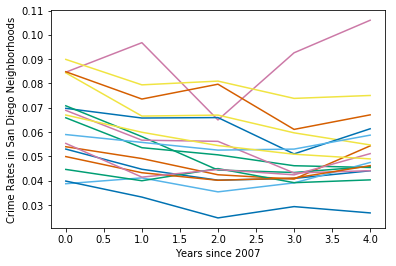

In [360]:
plt.xlabel('Years since 2007')
plt.ylabel('Crime Rates in San Diego Neighborhoods')
_ = plt.plot(crimebread[:][:])


# 